In [0]:
# upload dataset of cat_dogs_humans_horses present in Imgaes folder

In [0]:
!unzip Images.zip

In [0]:
import os
folders=os.listdir("Images")
for f in folders:
  path="Images/"+f
  print(f+" "+str(len(os.listdir(path))))

dogs 202
cats 202
humans 202
horses 202


In [0]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
sample_path="Images/cats/cat.193.jpg"
img=image.load_img(sample_path)


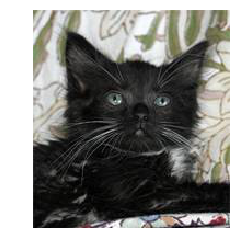

In [0]:
x=image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()

In [0]:
#model
from keras.layers import *
from keras.models import Sequential
model=Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

W0630 06:19:27.275073 139678648665984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0630 06:19:27.327247 139678648665984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 06:19:27.334215 139678648665984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0630 06:19:27.371609 139678648665984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import optimizers

In [0]:
adam=optimizers.adam(lr=1e-4)

In [0]:
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['acc'])

W0630 06:20:04.528004 139678648665984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0630 06:20:04.539885 139678648665984 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [0]:
#model.fit() # useful when dataset is small and can be fit in memory
from keras.preprocessing.image import ImageDataGenerator

You need to move some of the images to a separate folder named val_images for validataion purpose . We will do this by using "shutil" command.

In [22]:
import os,shutil
folders=os.listdir("Images")

if not os.path.isdir("val_images"):
  os.mkdir("val_images")
classes=["cats","dogs","horses","humans"]
# !ls
for c in classes:
  p=os.path.join("val_images",c)
#   if not p:
  os.mkdir(p)
#   else:
#     print(p," is present.")
SPLIT  =0.9
for f in os.listdir("Images"):
  path="Images/"+f
  imgs=os.listdir(path)
  split_size=int(SPLIT*len(imgs))
  files_to_move=imgs[split_size:]
  print(len(files_to_move))
  
  for img_f in files_to_move:
    src=os.path.join(path,img_f)
    dest=os.path.join("val_images/"+f,img_f)
    shutil.move(src,dest)
#     print(src,dest)

21
21
21
21


In [40]:
print("Training Data :")
for f in folders:
  path="Images/"+f
  print(f,str(len(os.listdir(path))))

print("\nValidation Data :")
for f in folders:
  path="val_images/"+f
  print(f,str(len(os.listdir(path))))

Training Data :
dogs 181
cats 181
humans 181
horses 181

Validation Data :
dogs 21
cats 21
humans 21
horses 21


In [41]:
train_gen=ImageDataGenerator(rescale=1.0/255)
val_gen=ImageDataGenerator(rescale=1.0/255)
train_generator=train_gen.flow_from_directory("Images/",
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode='categorical'
                                             )
val_generator=val_gen.flow_from_directory("val_images/",
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode='categorical'
                                             )

Found 724 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


In [29]:
history=model.fit_generator(train_generator,
                           epochs=40,
                           steps_per_epoch=7,
                            validation_data=val_generator,
                            validation_steps=4
                           )
# model.fit_generator?

Epoch 1/40
7/7 [==============================] - 1s 149ms/step - loss: 0.9317 - acc: 0.6161 - val_loss: 1.0797 - val_acc: 0.4828
Epoch 2/40
7/7 [==============================] - 1s 140ms/step - loss: 1.0067 - acc: 0.5893 - val_loss: 1.0407 - val_acc: 0.5673
Epoch 3/40
7/7 [==============================] - 1s 103ms/step - loss: 0.9344 - acc: 0.6212 - val_loss: 1.1432 - val_acc: 0.4741
Epoch 4/40
7/7 [==============================] - 1s 112ms/step - loss: 0.9740 - acc: 0.5804 - val_loss: 1.0068 - val_acc: 0.5086
Epoch 5/40
7/7 [==============================] - 1s 116ms/step - loss: 0.8776 - acc: 0.6384 - val_loss: 1.0614 - val_acc: 0.5385
Epoch 6/40
7/7 [==============================] - 1s 117ms/step - loss: 0.9063 - acc: 0.6027 - val_loss: 1.0617 - val_acc: 0.5603
Epoch 7/40
7/7 [==============================] - 1s 104ms/step - loss: 0.8820 - acc: 0.6370 - val_loss: 1.0478 - val_acc: 0.5431
Epoch 8/40
7/7 [==============================] - 1s 106ms/step - loss: 0.9315 - acc: 0.58

In [0]:
#Results

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

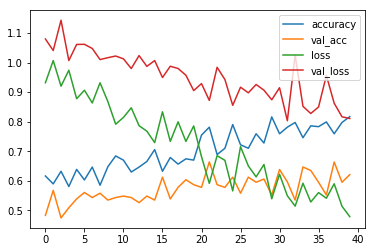

In [42]:
#plotting of graphs
from matplotlib import pyplot as plt
plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val_acc")
plt.plot(loss,label="loss")
plt.plot(val_loss,label="val_loss")
plt.legend()
plt.show()

In [0]:
model.save('cat_dogs_humans_horses_model.h5')

In [57]:
from keras.models import load_model
import cv2
import numpy as np

classes_dict=["cats","dogs","horses","humans"]

model = load_model('cat_dogs_humans_horses_model.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
path="Images/humans/rider-1.jpg"
# sample_img = image.load_img(path)
# sample_img=image.img_to_array(sample_img)/255.0
# plt.imshow(sample_img)
img=cv2.imread(path)
img =cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes= model.predict_classes(img)

print(classes_dict[int(classes)])

humans
